<a href="https://colab.research.google.com/github/ningxia202109/llm-learn/blob/main/GraphRAG/GraphRAG_OPENAI_Basic_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install packages of GraphRAG
%%capture --no-stderr
!pip install graphrag

In [2]:
# Intial GraphRAG folder
%cd /content
!mkdir -p ./ragtest/input
!python -m graphrag.index --init --root ./ragtest

/content
2024-08-06 03:43:26.877269: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-06 03:43:26.905911: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-06 03:43:26.913930: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-06 03:43:28.915671: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Initializing project at ./ragtest
⠋ GraphRAG Indexer 

In [13]:
# Sample text
%%writefile /content/ragtest/input/sample.txt

出师表

诸葛亮

臣亮言：先帝创业未半，而中道崩殂；今天下三分，益州疲敝，此诚
危急存亡之秋也。然侍卫之臣，不懈于内；忠志之士，忘身于外者：盖追
先帝之殊遇，欲报之于陛下也。诚宜开张圣听，以光先帝遗德，恢弘志士
之气；不宜妄自菲薄，引喻失义，以塞忠谏之路也。宫中府中，俱为一体；
陟罚臧否，不宜异同：若有作奸犯科，及为忠善者，宜付有司，论其刑赏，
以昭陛下平明之治；不宜偏私，使内外异法也。侍中、侍郎郭攸之、费依、
董允等，此皆良实，志虑忠纯，是以先帝简拔以遗陛下：愚以为宫中之事，
事无大小，悉以咨之，然后施行，必得裨补阙漏，有所广益。将军向宠，
性行淑均，晓畅军事，试用之于昔日，先帝称之曰“能”，是以众议举宠
为督：愚以为营中之事，事无大小，悉以咨之，必能使行阵和穆，优劣得
所也。亲贤臣，远小人，此先汉所以兴隆也；亲小人，远贤臣，此后汉所
以倾颓也。先帝在时，每与臣论此事，未尝不叹息痛恨于桓、灵也！侍中、
尚书、长史、参军，此悉贞亮死节之臣也，愿陛下亲之、信之，则汉室之
隆，可计日而待也。

臣本布衣，躬耕南阳，苟全性命于乱世，不求闻达于诸侯。先帝不以
臣卑鄙，猥自枉屈，三顾臣于草庐之中，谘臣以当世之事，由是感激，遂
许先帝以驱驰。后值倾覆，受任于败军之际，奉命于危难之间：尔来二十
有一年矣。先帝知臣谨慎，故临崩寄臣以大事也。受命以来，夙夜忧虑，
恐付托不效，以伤先帝之明；故五月渡泸，深入不毛。今南方已定，甲兵
已足，当奖帅三军，北定中原，庶竭驽钝，攘除奸凶，兴复汉室，还于旧
都：此臣所以报先帝而忠陛下之职分也。至于斟酌损益，进尽忠言，则攸
之、依、允等之任也。愿陛下托臣以讨贼兴复之效，不效则治臣之罪，以
告先帝之灵；若无兴复之言，则责攸之、依、允等之咎，以彰其慢。陛下
亦宜自谋，以谘诹善道，察纳雅言，深追先帝遗诏。臣不胜受恩感激！今
当远离，临表涕泣，不知所云。

Overwriting /content/ragtest/input/sample.txt


In [14]:
# Configurea GraphRAG
%%writefile ./ragtest/settings.yaml

encoding_model: cl100k_base
skip_workflows: []
llm:
  api_key: ${GRAPHRAG_API_KEY}
  type: openai_chat # or azure_openai_chat
  model: gpt-4o-mini
  model_supports_json: true # recommended if this is available for your model.
  # max_tokens: 4000
  # request_timeout: 180.0
  # api_base: https://<instance>.openai.azure.com
  # api_version: 2024-02-15-preview
  # organization: <organization_id>
  # deployment_name: <azure_model_deployment_name>
  # tokens_per_minute: 150_000 # set a leaky bucket throttle
  # requests_per_minute: 10_000 # set a leaky bucket throttle
  # max_retries: 10
  # max_retry_wait: 10.0
  # sleep_on_rate_limit_recommendation: true # whether to sleep when azure suggests wait-times
  # concurrent_requests: 25 # the number of parallel inflight requests that may be made
  # temperature: 0 # temperature for sampling
  # top_p: 1 # top-p sampling
  # n: 1 # Number of completions to generate

parallelization:
  stagger: 0.3
  # num_threads: 50 # the number of threads to use for parallel processing

async_mode: threaded # or asyncio

embeddings:
  ## parallelization: override the global parallelization settings for embeddings
  async_mode: threaded # or asyncio
  llm:
    api_key: ${GRAPHRAG_API_KEY}
    type: openai_embedding # or azure_openai_embedding
    model: text-embedding-3-small
    # api_base: https://<instance>.openai.azure.com
    # api_version: 2024-02-15-preview
    # organization: <organization_id>
    # deployment_name: <azure_model_deployment_name>
    # tokens_per_minute: 150_000 # set a leaky bucket throttle
    # requests_per_minute: 10_000 # set a leaky bucket throttle
    # max_retries: 10
    # max_retry_wait: 10.0
    # sleep_on_rate_limit_recommendation: true # whether to sleep when azure suggests wait-times
    # concurrent_requests: 25 # the number of parallel inflight requests that may be made
    # batch_size: 16 # the number of documents to send in a single request
    # batch_max_tokens: 8191 # the maximum number of tokens to send in a single request
    # target: required # or optional



chunks:
  size: 1200
  overlap: 100
  group_by_columns: [id] # by default, we don't allow chunks to cross documents

input:
  type: file # or blob
  file_type: text # or csv
  base_dir: "input"
  file_encoding: utf-8
  file_pattern: ".*\\.txt$"

cache:
  type: file # or blob
  base_dir: "cache"
  # connection_string: <azure_blob_storage_connection_string>
  # container_name: <azure_blob_storage_container_name>

storage:
  type: file # or blob
  base_dir: "output/${timestamp}/artifacts"
  # connection_string: <azure_blob_storage_connection_string>
  # container_name: <azure_blob_storage_container_name>

reporting:
  type: file # or console, blob
  base_dir: "output/${timestamp}/reports"
  # connection_string: <azure_blob_storage_connection_string>
  # container_name: <azure_blob_storage_container_name>

entity_extraction:
  ## llm: override the global llm settings for this task
  ## parallelization: override the global parallelization settings for this task
  ## async_mode: override the global async_mode settings for this task
  prompt: "prompts/entity_extraction.txt"
  entity_types: [organization,person,geo,event]
  max_gleanings: 1

summarize_descriptions:
  ## llm: override the global llm settings for this task
  ## parallelization: override the global parallelization settings for this task
  ## async_mode: override the global async_mode settings for this task
  prompt: "prompts/summarize_descriptions.txt"
  max_length: 500

claim_extraction:
  ## llm: override the global llm settings for this task
  ## parallelization: override the global parallelization settings for this task
  ## async_mode: override the global async_mode settings for this task
  # enabled: true
  prompt: "prompts/claim_extraction.txt"
  description: "Any claims or facts that could be relevant to information discovery."
  max_gleanings: 1

community_reports:
  ## llm: override the global llm settings for this task
  ## parallelization: override the global parallelization settings for this task
  ## async_mode: override the global async_mode settings for this task
  prompt: "prompts/community_report.txt"
  max_length: 2000
  max_input_length: 8000

cluster_graph:
  max_cluster_size: 10

embed_graph:
  enabled: false # if true, will generate node2vec embeddings for nodes
  # num_walks: 10
  # walk_length: 40
  # window_size: 2
  # iterations: 3
  # random_seed: 597832

umap:
  enabled: false # if true, will generate UMAP embeddings for nodes

snapshots:
  graphml: true
  raw_entities: true
  top_level_nodes: true

local_search:
  # text_unit_prop: 0.5
  # community_prop: 0.1
  # conversation_history_max_turns: 5
  # top_k_mapped_entities: 10
  # top_k_relationships: 10
  # llm_temperature: 0 # temperature for sampling
  # llm_top_p: 1 # top-p sampling
  # llm_n: 1 # Number of completions to generate
  # max_tokens: 12000

global_search:
  # llm_temperature: 0 # temperature for sampling
  # llm_top_p: 1 # top-p sampling
  # llm_n: 1 # Number of completions to generate
  # max_tokens: 12000
  # data_max_tokens: 12000
  # map_max_tokens: 1000
  # reduce_max_tokens: 2000
  # concurrency: 32

Overwriting ./ragtest/settings.yaml


In [7]:
# Setup env
import os
from google.colab import userdata

os.environ['GRAPHRAG_API_KEY'] = userdata.get('OPENAI_API_KEY')

In [15]:
# GraphRAG Indexing
!python -m graphrag.index --root ./ragtest

2024-08-06 04:04:22.783957: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-06 04:04:22.824916: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-06 04:04:22.837162: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-06 04:04:25.117662: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
🚀 Reading settings from ragtest/settings.yaml
⠋ GraphRAG Indexer 
⠋ GraphRAG Indexer 
├── Loading Input (text) - 1 files loaded (0 filtered) ━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00 0:00:00
⠋ GraphRAG Indexer 
├── Loading Input (text) - 1 files

In [17]:
# global query
!python -m graphrag.query --root ./ragtest --method global "诸葛亮要做什么事?"

2024-08-06 04:06:48.581578: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-06 04:06:48.608537: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-06 04:06:48.616389: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-06 04:06:50.338879: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


INFO: Reading settings from ragtest/settings.yaml
creating llm client with {'api_key': 'REDACTED,len=56', 'type': "openai_chat", 'model': 'gpt-4o-mini', 'max_tokens': 4000, 'temperature': 0.0, 'top_p': 1.0, 'n': 1, 'request_timeout': 180.0

In [18]:
# Local query
!python -m graphrag.query --root ./ragtest --method local "诸葛亮要做什么事?"

2024-08-06 04:07:49.358420: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-06 04:07:49.387387: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-06 04:07:49.395198: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-06 04:07:51.347327: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


INFO: Reading settings from ragtest/settings.yaml

INFO: Vector Store Args: {}
creating llm client with {'api_key': 'REDACTED,len=56', 'type': "openai_chat", 'model': 'gpt-4o-mini', 'max_tokens': 4000, 'temperature': 0.0, 'top_p': 1.0, 'n'

In [19]:
# tar output
%%capture --no-stderr
!tar -czvf output.tar.gz ./ragtest/output/

./ragtest/output/
./ragtest/output/20240806-035621/
./ragtest/output/20240806-035621/reports/
./ragtest/output/20240806-035621/reports/indexing-engine.log
./ragtest/output/20240806-035621/reports/logs.json
./ragtest/output/20240806-035621/artifacts/
./ragtest/output/20240806-035621/artifacts/stats.json
./ragtest/output/20240806-035621/artifacts/create_base_extracted_entities.parquet
./ragtest/output/20240806-035621/artifacts/create_final_entities.parquet
./ragtest/output/20240806-035621/artifacts/create_base_text_units.parquet
./ragtest/output/20240806-035621/artifacts/create_base_entity_graph.parquet
./ragtest/output/20240806-035621/artifacts/create_final_documents.parquet
./ragtest/output/20240806-035621/artifacts/join_text_units_to_relationship_ids.parquet
./ragtest/output/20240806-035621/artifacts/create_base_documents.parquet
./ragtest/output/20240806-035621/artifacts/create_final_communities.parquet
./ragtest/output/20240806-035621/artifacts/create_final_relationships.parquet
./r

In [20]:
from google.colab import files
files.download('output.tar.gz')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
%%capture --no-stderr
!pip install networkx==2.8.8

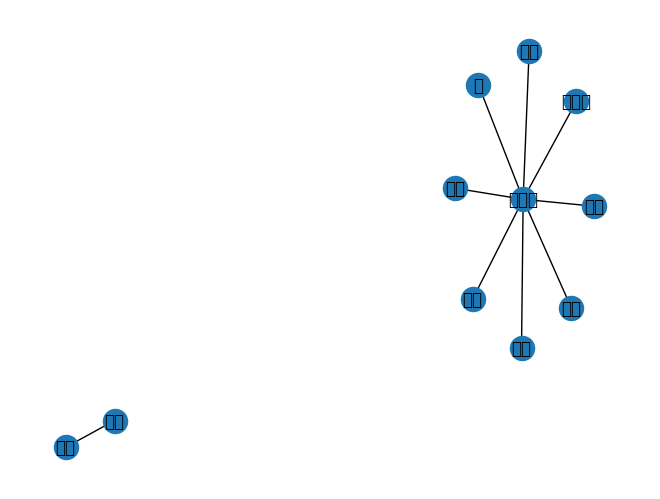

In [25]:

import networkx as nx
import matplotlib.pyplot as plt

# Load the GraphML file
G = nx.read_graphml("ragtest/output/20240806-040436/artifacts/summarized_graph.graphml")

# Draw the graph
nx.draw(G, with_labels=True)
plt.show()